원문: Moler, Cleve B. Numerical computing with MATLAB. Society for Industrial and Applied Mathematics, 2008.

# 1.4 마방진

마방진으로 흥미로운 예제 행렬을 만들 수 있다.

In [1]:
import numpy as np


def magic(N):
    if (N % 2):
        result = magic_odd(N)
    elif 0 == (N % 4):
        result = magic_four(N)
    elif (N % 4):
        result = magic_even_odd(N)
    else:
        raise NotImplementedError

    # check result
    assert_magic_square(result, N)

    return result


def magic_odd(N):
    # scipython.com/book/chapter-6-numpy/examples/creating-a-magic-square/
    magic_square = np.matrix(np.zeros((N, N), dtype=int))

    n = 1
    i, j = 0, N // 2

    while n <= N ** 2:
        magic_square[i, j] = n
        n += 1
        newi, newj = (i - 1) % N, (j + 1) % N
        if magic_square[newi, newj]:
            i += 1
        else:
            i, j = newi, newj

    return magic_square


def magic_four(N):
    # https://m.blog.naver.com/askmrkwon/220768685076 (in Korean)
    magic_ascending = np.array(range(1, N ** 2 + 1), dtype=int).reshape((N, N))
    magic_descending = np.array(range(N ** 2, 0, -1), dtype=int).reshape((N, N))
    magic_four_mat = np.matrix(np.zeros((N, N)), dtype=int)

    for i_row in range(0, N):
        for j_col in range(0, N):
            if (0 == (abs(i_row - j_col) % 4)) or (0 == (i_row + j_col + 1) % 4):
                magic_four_mat[i_row, j_col] = magic_descending[i_row, j_col]
            else:
                magic_four_mat[i_row, j_col] = magic_ascending[i_row, j_col]

    assert 0 < magic_four_mat.min()

    return magic_four_mat


def magic_even_odd(even):
    # https://m.blog.naver.com/askmrkwon/220768685076 (in Korean)

    assert 0 == (even % 2)

    odd = even // 2  # 2n + 1

    assert (odd % 2)

    upper_left = magic_odd(odd)
    lower_right = upper_left + (odd * odd)
    upper_right = lower_right + (odd * odd)
    lower_left = upper_right + (odd * odd)

    assert upper_left.min() == 1
    assert upper_left.max() == odd * odd

    assert lower_right.min() == upper_left.max() + 1
    assert lower_right.max() == odd * odd * 2

    assert upper_right.min() == lower_right.max() + 1
    assert upper_right.max() == odd * odd * 3

    assert lower_left.min() == upper_right.max() + 1
    assert lower_left.max() == even * even

    n = (odd - 1) // 2

    # exchange left
    temp = upper_left[:, 0:n].copy()
    upper_left[:, 0:n] = lower_left[:, 0:n]
    lower_left[:, 0:n] = temp

    # exchange right
    if 1 < n :
        temp = upper_right[:, -(n - 1):].copy()
        upper_right[:, -(n - 1):] = lower_right[:, -(n - 1):]
        lower_right[:, -(n - 1):] = temp

    # exchange left middle
    temp = upper_left[n, (n - 1):(n + 1)].copy()
    upper_left[n, (n - 1):(n + 1)] = lower_left[n, (n - 1):(n + 1)]
    lower_left[n, (n - 1):(n + 1)] = temp

    result = np.row_stack((np.column_stack((upper_left, upper_right)),
                           np.column_stack((lower_left, lower_right))))

    # check result
    assert_magic_square(result, even)

    return result


def assert_magic_square(mat, n):
    # check result
    magic_sum = np.sum(mat) / n
    row_sum_vector = np.sum(mat, 0)
    col_sum_vector = np.sum(mat, 1)
    assert np.abs(row_sum_vector - magic_sum).max() < 1e-7
    assert np.abs(row_sum_vector - magic_sum).min() < 1e-7
    assert np.abs(col_sum_vector - magic_sum).max() < 1e-7
    assert np.abs(col_sum_vector - magic_sum).min() < 1e-7


A = magic(3)
A

matrix([[8, 1, 6],
        [3, 5, 7],
        [4, 9, 2]])

아래 명령은 모든 요소의 합을 계산한다.

In [2]:
np.sum(A)

45

각 열의 합은 아래 명령으로 계산한다.

In [3]:
np.sum(A, 0)

matrix([[15, 15, 15]])

각 행의 합은 다음과 같이 구한다.

In [4]:
np.sum(A, 1)

matrix([[15],
        [15],
        [15]])

다음은 주대각선의 합을 계산한다.

In [5]:
np.sum(np.diag(A))

15

반 대각선은 오른쪽 위에서 왼쪽 아래를 잇는 대각선으로, 선형 대수에서는 중요성이 덜하기 때문에, 합을 구하는 절차가 다소 복잡히다. 한가지 방법은 행렬을 위아래로 뒤집는 함수를 사용하는 것이다.

In [6]:
np.sum(np.diag(np.flipud (A)))

15

따라서 모든 합이 같다는 것을 확인할 수 있다.

왜 합은 15인가? 아래 명령

In [7]:
sum(np.arange(1, 9+1))

45

은 1 부터 9 까지의 정수의 합이 45임을 말한다. 이 정수들이 3 열에 나누어지고 합계가 같다면 그 합은

In [8]:
sum(np.arange(1, 9+1)) / 3

15.0

15가 될 것이다.

OHP 에 투명지를 올려놓는 방법은 모두 8가지가 있다. 비슷하게, 3렬의 마방진을 배열하는 8가지 방법이 있다.  아래 명령은 각각의 방법을 모두 표시한다.

In [9]:
for k in range(0, 4):
    print(np.rot90(A, k))
    print(np.rot90(A.T, k))

[[8 1 6]
 [3 5 7]
 [4 9 2]]
[[8 3 4]
 [1 5 9]
 [6 7 2]]
[[6 7 2]
 [1 5 9]
 [8 3 4]]
[[4 9 2]
 [3 5 7]
 [8 1 6]]
[[2 9 4]
 [7 5 3]
 [6 1 8]]
[[2 7 6]
 [9 5 1]
 [4 3 8]]
[[4 3 8]
 [9 5 1]
 [2 7 6]]
[[6 1 8]
 [7 5 3]
 [2 9 4]]


이제 선형 대수를 좀 살펴보자. 행렬식은 다음과 같다.

In [10]:
import numpy.linalg as na
na.det(A)

-359.99999999999972

역행렬은

In [11]:
X = A.I
X

matrix([[ 0.14722222, -0.14444444,  0.06388889],
        [-0.06111111,  0.02222222,  0.10555556],
        [-0.01944444,  0.18888889, -0.10277778]])

이다. 분수 형태로 표시할 수 있다면 더 좋다.

In [12]:
import fractions
np.set_printoptions(formatter={'all': lambda x: str(fractions.Fraction(x).limit_denominator())})
print(X)

[[53/360 -13/90 23/360]
 [-11/180 1/45 19/180]
 [-7/360 17/90 -37/360]]


아래와 같이 하면 원상 복귀 될 것이다.

In [13]:
np.set_printoptions(formatter=None)

전산 선형 대수에서 중요한 3가지 값으로 행렬의 놂, 고유치, 특이값 등이 있다.

In [14]:
r = na.norm(A, np.inf)
e, w = na.eig(A)
u, s, v_h = na.svd(A)
print('r =')
print(r)
print('e =')
print(e)
print('s =')
print(s)

r =
15.0
e =
[ 15.           4.89897949  -4.89897949]
s =
[ 15.           6.92820323   3.46410162]


마방진의 한 열의 합은 위 3 값에서 모두 나타난다. 고유 벡터 (아래의 w), 좌 우 특이 벡터 (각각 아래의 u, v) 가운데 하나는 모두 1인 것이 있기 때문이다. (w, u, v 의 각 열 가운데 하나씩은 모든 항의 값이 같음)

In [15]:
print('w =')
print(w)
print('u =')
print(u)
print('v =')
print(v_h.H)

w =
[[-0.57735027 -0.81305253 -0.34164801]
 [-0.57735027  0.47140452 -0.47140452]
 [-0.57735027  0.34164801  0.81305253]]
u =
[[ -5.77350269e-01   7.07106781e-01   4.08248290e-01]
 [ -5.77350269e-01   5.96744876e-15  -8.16496581e-01]
 [ -5.77350269e-01  -7.07106781e-01   4.08248290e-01]]
v =
[[ -5.77350269e-01   4.08248290e-01   7.07106781e-01]
 [ -5.77350269e-01  -8.16496581e-01  -1.16573418e-14]
 [ -5.77350269e-01   4.08248290e-01  -7.07106781e-01]]


지금까지 이 절의 모든 연산은 부동소숫점이었다. 대부분의 과학 기술 계산, 특히 큰 행렬의 연산은 이렇게 한다. 하지만 $3\times3$ 행렬 정도 라면 기호 연산도 용이하다.

In [16]:
import sympy as sy

A = sy.Matrix(A)
A

Matrix([
[8.0, 1.0, 6.0],
[3.0, 5.0, 7.0],
[4.0, 9.0, 2.0]])

In [17]:
print('np.sum(A) = %r' % np.sum(A))
print('np.sum(A, 0) = %r' % np.sum(A, 0))
print('np.sum(A, 1) = %r' % np.sum(A, 1))
print('sy.det(A) = %r' % sy.det(A))
print('A.eigenvals() = %r' % A.eigenvals())
print('A.singular_values() = %r' % A.singular_values())

np.sum(A) = 45.0000000000000
np.sum(A, 0) = array([15.0000000000000, 15.0000000000000, 15.0000000000000], dtype=object)
np.sum(A, 1) = array([15.0000000000000, 15.0000000000000, 15.0000000000000], dtype=object)
sy.det(A) = -360.000000000000
A.eigenvals() = {-2*sqrt(6): 1, 2*sqrt(6): 1, 15: 1}
A.singular_values() = [4*sqrt(3), 2*sqrt(3), 15]


$4\times4$ 마방진은 르네상스 시대 알브레히트 뒤러의 동판화 *멜랑콜리아* 에 표현된 여러 수학적 오브제 가운데 하나이다.

In [18]:
A = magic(4)
A

matrix([[16,  2,  3, 13],
        [ 5, 11, 10,  8],
        [ 9,  7,  6, 12],
        [ 4, 14, 15,  1]])

아래 명령들을 실행해 보면 각 행, 열, 대각선의 합이 모두 34로 A가 마방진임을 확인할 수 있다.

In [19]:
print('np.sum(A, 0) = %r' % np.sum(A, 0))
print('np.sum(A, 1) = %r' % np.sum(A, 1))
print('np.sum(np.diag(A)) = %r' % np.sum(np.diag(A)))
print('np.sum(np.diag(np.flipud(A))) = %r' % np.sum(np.diag(np.flipud(A))))

np.sum(A, 0) = matrix([[34, 34, 34, 34]])
np.sum(A, 1) = matrix([[34],
        [34],
        [34],
        [34]])
np.sum(np.diag(A)) = 34
np.sum(np.diag(np.flipud(A))) = 34


그러나 이 $4\times4$ 마방진은 뒤러의 마방진과 같지는 않다. 두번째 세번째 열을 바꾸어야 한다.

In [20]:
A = A[:, [0, 2, 1, 3]]
A

matrix([[16,  3,  2, 13],
        [ 5, 10, 11,  8],
        [ 9,  6,  7, 12],
        [ 4, 15, 14,  1]])

열 교환으로는 열 합계 또는 행 합계가 바뀌지 않는다.  보통 대각 합계는 바뀌지만 이경우에는 두 대각 합계 모두 34이다. 이제 이 마방진은 뒤러의 동판화와 일치하게 되었다. 뒤러가 이 행렬을 택한 이유는 아마도 작업했던 해인 1514년이 맨 아랫 줄에 나타났기 때문일 것이다.

지금까지 우리는 $4\times4$ 마방진 두개를 관찰했다. $4\times4$ 마방진은 모두 880개가 있고, $5\times5$ 마방진은 275305224가지가 있다는 점이 드러났다. $6\times6$ 이상의 마방진의 종류를 구분하는 것은 아직 해결되지 않은 문제이다.

우리의 $4\times4$ 마방진의 행렬식은 0이다. 만일 역행렬을 구하려고 한다면

In [21]:
na.det(A)

1.0871303857129486e-12

In [22]:
A.I

matrix([[  1.25099990e+14,   3.75299969e+14,  -3.75299969e+14,
          -1.25099990e+14],
        [ -3.75299969e+14,  -1.12589991e+15,   1.12589991e+15,
           3.75299969e+14],
        [  3.75299969e+14,   1.12589991e+15,  -1.12589991e+15,
          -3.75299969e+14],
        [ -1.25099990e+14,  -3.75299969e+14,   3.75299969e+14,
           1.25099990e+14]])

따라서 어떤 마방진은 특이행렬이라고 볼 수 있다.  어떤 행렬이 그러한가? 정방 행렬의 계수 rank 는 선형적으로 독립인 행 또는 열의 수 이다. $n\times n$ 행렬을 특이행렬이라고 볼 수 있는 필요 충분 조건은, 그 계수 rank 가 $n$ 보다 작은 것이다.

In [23]:
r = np.array([(n, na.matrix_rank(magic(n))) for n in range(3, 24+1)])
r

array([[ 3,  3],
       [ 4,  3],
       [ 5,  5],
       [ 6,  5],
       [ 7,  7],
       [ 8,  3],
       [ 9,  9],
       [10,  7],
       [11, 11],
       [12,  3],
       [13, 13],
       [14,  9],
       [15, 15],
       [16,  3],
       [17, 17],
       [18, 11],
       [19, 19],
       [20,  3],
       [21, 21],
       [22, 13],
       [23, 23],
       [24,  3]])

위 결과를 조심스럽게 살펴 보자.  어떤 규칙성이 보이는가?  막대그래프에서 더 잘 보인다.

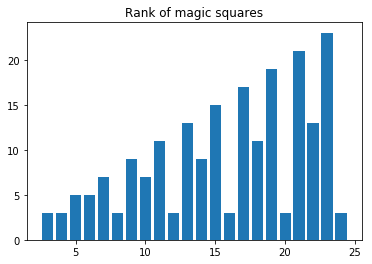

In [24]:
import matplotlib.pyplot as plt


plt.bar(r[:, 0], r[:, 1])
plt.title('Rank of magic squares')
plt.show()

rank 에 따라 3가지 마방진이 있다.
* 홀수
* 홀수의 2배
* 짝수의 2배

홀수차 마방진은 full rank 이다. 이들은 특이행렬이 아니며 역행렬을 가진다. 짝수의 2배 차수 마방진은 n 이 아무리 크더라도 rank 는 3이다.  이들은 *매우 특이* 하다고 부를 수 있다.  홀수의 2배 차수 마방진의 rank 는 $n/2 + 2$이다.  이들도 특이행렬이지만, 행과 열이 짝수의 2배수 차수 보다 더 독립적이다.

마방진의 종류에 따라 3차원 곡면도 달라진다. 다양한 n 에 대해 다음을 시도해 보라.

In [25]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

dummy = dir(Axes3D)

fig = plt.figure()

for n in range(8, 11+1):
    ax = fig.add_subplot(2, 2, n - 7, projection='3d')
    m = np.array(magic(n)) 
    ax.add_surface(m)
    plt.title('m%d' % n)
    plt.axis('off')
    plt.axis('equal')

plt.savefig('magic_square_surf.png')

from IPython.display import Image
Image('magic_square_surf.png')

Help on class Axes3D in module mpl_toolkits.mplot3d.axes3d:

class Axes3D(matplotlib.axes._axes.Axes)
 |  3D axes object.
 |  
 |  Method resolution order:
 |      Axes3D
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fig, rect=None, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add_collection3d(self, col, zs=0, zdir='z')
 |      Add a 3D collection object to the plot.
 |      
 |      2D collection types are converted to a 3D version by
 |      modifying the object and adding z coordinate information.
 |      
 |      Supported are:
 |          - PolyCollection
 |          - LineColleciton
 |          - PatchCollection
 |  
 |  add_contour_set(self, cset, extend3d=False, stride=5, zdir='z', offset=None)
 |  
 |  add_contourf_set(self, cset, zdir='z', offset=None)
 |  
 |  auto_scale_xyz(self, X, Y

AttributeError: 'Axes3DSubplot' object has no attribute 'add_surface'